# EXAMEN Stats

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn.linear_model import LassoCV, Lasso ,LinearRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, average_precision_score, f1_score
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split

%matplotlib inline

## Exercice 1

On sait que $\hat{g}=\frac{1}{n-1}\sum_1^n(X_i-\bar{X_n})^2=\sigma^2$ est un estimateur sans biais de la variance. On peut donc réécrire $\hat{V}_{\alpha}$ :
$$
\begin{align}
\hat{V}_{\alpha} &=(n-1)\alpha\frac{1}{n-1}\sum_1^n(X_i-\bar{X_n})^2 \\
\Longrightarrow E(\hat{V}_{\alpha}) &= (n-1)\alpha\sigma^2
\end{align}
$$
Le biais s'écrit alors
$$E(\hat{V}_{\alpha})-\sigma^2=\sigma^2\left[(n-1)\alpha-1\right]\neq 0$$
Cet estimateur est donc biaisé.

Calcul du risque quadratique moyen :
$$\begin{align}E(\hat{V}_{\alpha}-\sigma^2)^2 &= Var(\hat{V}_{\alpha})+Biais(\hat{V}_{\alpha}) \\
&= 2\sigma^4(n-1)\alpha^2+\sigma^4((n-1)\alpha-1) \\
&= \sigma^4 \left[\alpha^2\left(2(n-1)+(n-1)^2\right)-2\alpha(n-1)+1 \right] \\
&= \sigma^4f(\alpha)
\end{align}$$


On cherche $\alpha_0$ minimisant le risque et donc la fonction $f(\alpha)$. La dérivée seconde de $f$ étant positive, on a $f$ convexe. Alors si on trouve un extremum c'est un minimum de la fonction.

$$
\frac{\mathrm{d}f}{\mathrm{d}\theta} = 2\alpha_0(2(n-1)+(n-1)^2)-2(n-1) = 0
$$

D'où :
$$
\begin{align}
\alpha_0 &= \frac{n-1}{2(n-1)+(n-1)^2} \\
&= \frac{1}{n+1}
\end{align}
$$


Le risque minimal est donc atteint pour $\alpha_0=\frac{1}{n+1}$.

## Exercice 2

In [54]:
# à mettre sur True pour la question 11
fit_intercept = False

#### Q1

In [55]:
from sklearn.datasets.mldata import fetch_mldata
dataset_name = 'leukemia'
data = fetch_mldata(dataset_name)
X = data.data
y = data.target
X = X.astype(float)
y = y.astype(float)

Xdf = pd.DataFrame(data.data)
print(Xdf.head())

print(np.shape(X))
print(np.shape(y))

       0         1         2         3         4         5         6     \
0 -1.462360 -0.645135 -0.835925 -1.470420 -0.919971 -1.584260  0.712393   
1 -0.664799  0.206146 -0.368575  0.258225 -0.475673 -0.354967 -1.119370   
2 -0.200487  0.379941 -2.382780  0.439604 -1.226960 -1.762190  0.104636   
3 -0.257755  0.279937  1.839170 -1.629500 -1.287480 -1.265130  0.763342   
4 -0.564569 -0.395885 -0.983716 -0.837410 -0.414772  0.148339 -0.035498   

       7         8         9       ...         7119      7120      7121  \
0 -0.542291  1.050910  0.236488    ...    -0.484449 -0.671805 -1.809170   
1 -0.292513 -0.375421 -0.387603    ...    -0.722190  0.352834 -0.804439   
2 -1.807490  0.492918 -1.670010    ...     0.690042  1.596130 -0.203062   
3 -0.616454 -0.315784 -0.321929    ...     0.688649  0.707999  2.156090   
4 -0.100216 -0.757526  0.370683    ...    -0.950918 -0.280190 -0.075149   

       7122      7123      7124      7125      7126      7127      7128  
0 -0.097850 -0.913618  0

===> Il y a donc 7129 variables axplicatives.

In [56]:
print("mean", np.mean(X[:,10]))
print("std", np.var(X[:,10]))

# avec la methode StandardScaler de scikit-learn,
# on centre et réduit la matrice X : 
scaler = preprocessing.StandardScaler(with_mean=False).fit(X)
X = scaler.transform(X)

print("mean", np.mean(X[:,10]))
print("std", np.var(X[:,10]))

mean 2.77777777909e-08
std 0.986109805726
mean 2.79727304406e-08
std 1.0


#### Q2

72


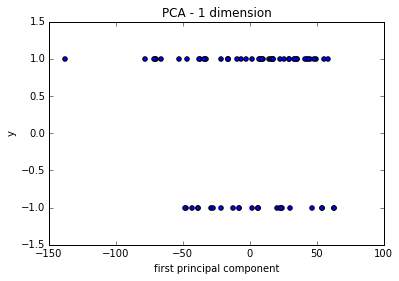

In [57]:
# On fait une pca pour trouver la direction principale à 1D
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print(len(X_pca))

plt.figure()
plt.title('PCA - 1 dimension')
plt.ylabel('y')
plt.xlabel('first principal component')
plt.scatter(X_pca,y)

(72, 2)


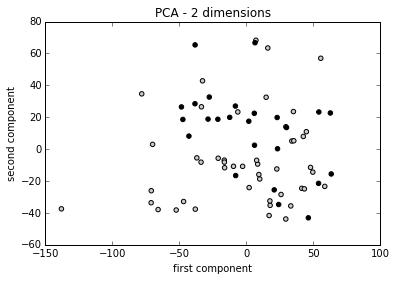

In [58]:
# On fait une pca pour trouver la direction principale à 2D
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)

print(np.shape(X_pca))


#fig = plt.figure(1, figsize=(4, 3))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.figure()
plt.title('PCA - 2 dimensions')
plt.ylabel('second component')
plt.xlabel('first component')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.spectral)



#### Q3

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train), np.shape(X_test))

(57, 7129) (15, 7129)


#### Q4

La nouvelle fonction à minimiser est $g(\theta)=\frac{1}{2n}\left|y-X\theta\right|_2^2+\lambda'\left|\theta\right|_1 = \frac{1}{n}\left(\frac{1}{2}\left|y-X\theta\right|_2^2+n\lambda'\left|\theta\right|_1\right)$

Le facteur $\frac{1}{n}$ dans cette expression ne change rien au résultat du minimum, par conséquent pour avoir $\hat{\theta}^{Lasso}_{\lambda}=\hat{\theta}^{Lasso pack}_{\lambda'}$ il faut
$$ \lambda' = \frac{\lambda}{n}$$

#### Q5

In [60]:
lassocv = LassoCV(n_alphas = 17, fit_intercept=fit_intercept)

# entraînement du modèle sur les données d'entraînement :
lassocv.fit(X_train, y_train) 

# predictions du modèle sur les données de validation :
y_pred = lassocv.predict(X_test)

# Erreur quadratique sur les données de validation :
Error2 = np.dot(y_pred.T, y_test)
Error2 = mean_squared_error(y_pred, y_test)
print("Erreur quadratique:", Error2)

Erreur quadratique: 0.279982251825


/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


#### Q6

In [61]:
class Thres_lasso(Lasso):
    
    def __init__(self, alpha=1.0, thres=0.01, eps_machine=1e-12,
                 max_iter=10000, tol=1e-7, fit_intercept=False):
        
        self.alpha = alpha
        self.max_iter = max_iter
        self.eps_machine = eps_machine
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.thres = thres
        
    def fit(self, X, y):
        lasso = Lasso(alpha = self.alpha)
        lasso.fit(X_train, y_train) 
        theta = lasso.coef_
    
        self.support_ = [i for i in range(len(theta)) if theta[i]>self.thres]
        
        if len(self.support_) > 0:
            X_red = X[:,self.support_]
            ols = LinearRegression(fit_intercept=self.fit_intercept)
            ols.fit(X_red, y)
            self.coef_ = ols.coef_
            self.intercept_ = ols.intercept_
        else:
            self.coef_ = np.zeros(np.shape(X)[1])
            self.intercept_ = 0
            
        return self
    
    def predict(self, X):
        if len(self.support_) > 0:
            X_red = X[:, self.support_]
            y = np.dot(X_red, self.coef_)
        else:
            y = np.zeros(len(X))
            
        return y
    

In [62]:
thres_l = Thres_lasso(thres=0.1, alpha=0.001, fit_intercept=fit_intercept)
thres_l.fit(X_train, y_train)
print(thres_l.coef_)
print(thres_l.support_)
print(thres_l.predict(X_test))

[ 0.53744726]
[634]
[ 0.20510456 -0.38850572  0.02284809 -0.2317677  -0.37346362 -0.40078813
  0.23551726 -0.03514404  1.66265628 -0.41862021  1.76115808  0.06403754
 -0.43507812  0.19519106 -0.3878687 ]


/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


#### Q7

En utilisant le Lasso, on selectionne les variables explicatives les plus pertinentes, et on peut se ramener à un cas où $n>p$ (ici on voudrait $p<72$). On peut alors utiliser les expressions suivantes pour estimer le niveau de bruit :
$$\hat{\sigma}^2=\frac{1}{n}\left|y-X\hat{\theta}\right|_2^2$$
ou bien
$$\hat{\sigma}^2=\frac{1}{n-rang(X)}\left|y-X\hat{\theta}\right|_2^2$$ 

Le premier étant biaisé, mais pas le second.

In [63]:
# estimateur biaisé
def sigma1(y_, y):
    v = y_ - y
    sig = np.dot(v.T, v) * 1/float(len(y))
    return sig

# estimateur sans biais
def sigma2(y_, y, X):
    v = y_ - y
    rang = np.linalg.matrix_rank(X)
    print(rang)
    sig = np.dot(v.T, v) * 1/float(len(y) - rang)
    return sig

In [64]:
print(sigma1(y_test, y_pred))

0.279982251825


#### Q8

In [65]:
# definition de la grille à explorer:
alphas = np.logspace(-7, -1, 10)
thresholds = np.logspace(-7, -1, 5)
print(alphas)
print(thresholds)

[  1.00000000e-07   4.64158883e-07   2.15443469e-06   1.00000000e-05
   4.64158883e-05   2.15443469e-04   1.00000000e-03   4.64158883e-03
   2.15443469e-02   1.00000000e-01]
[  1.00000000e-07   3.16227766e-06   1.00000000e-04   3.16227766e-03
   1.00000000e-01]


In [66]:
# definition de l'objet GridSearchCV
# qui selectionne par validation croisée
# le meilleur modèle sur l'espace des paramètres défini
# au-dessus
parameters = {'alpha':alphas, 'thres':thresholds}
thres_lasso = Thres_lasso(max_iter=100000, fit_intercept=fit_intercept)
clf = GridSearchCV(thres_lasso, parameters)

# entraînement
clf.fit(X_train, y_train)

# prediction sur les données de validation
y_pred_thresL = clf.predict(X_test)
print(y_pred_thresL)

/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarnin

[ 0.67372211 -1.47026036  0.85380862  1.34906524 -1.33748998 -1.76251625
 -0.16499418 -0.20564888  1.35304781 -0.42677073  1.62162814 -0.5599944
  0.46479006  0.37721376  0.22183578]


/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


#### Q9

In [67]:
# comparaison des erreurs de prédictions:
print("Erreur LassoCV:", mean_squared_error(y_test, y_pred))
print("Erreur Thres_Lasso avec CV:", mean_squared_error(y_test, y_pred_thresL))

ols = LinearRegression(fit_intercept=fit_intercept)
ols.fit(X_train, y_train)
y_ols = ols.predict(X_test)

print("Erreur OLS:",mean_squared_error(y_test, y_ols))

Erreur LassoCV: 0.279982251825
Erreur Thres_Lasso avec CV: 0.478303471504
Erreur OLS: 0.266691689925


#### Q10

In [68]:
# Test avec un Bolasso, combiné avec une validation croisée
# sur le paramètre de régularisation du Lasso.

def bolasso(X, y, m, alpha,fit_intercept):
    """
    X : feature matrix
    y : target
    m : number of bootstrap samples
    alpha : Lasso regularization parameter
    """

    support = np.ones(np.shape(X)[1])
    for i in range(m):
        Xi, yi = resample(X, y) # creating one bootstrap sample
        lasso = Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=1000)
        lasso.fit(Xi,yi) # applying Lasso on the sample
        support_temp = [ 1. if coef != 0. else 0. for coef in lasso.coef_] # support of the coef_ vector
        support = support_temp * support  # computing support_temp 'inter' support

    columns = [ i for i in range(np.shape(X)[1]) if support[i]==1.]

    X_red = X[:, columns] # selecting the columns in X that are indicated in support
    ols = LinearRegression(fit_intercept=fit_intercept)
    ols.fit(X_red,y) # ordinary least square using the reduced X matrix

    # building the result of bolasso
    theta = np.zeros(np.shape(X)[1])
    for i in range(len(columns)):
        theta[columns[i]] = ols.coef_[i]

    return theta, ols.intercept_


In [69]:
dico = {}
# validation croisée sur le paramètre lambda
for l in np.logspace(-9, -4, 10):
    print(l)
    theta, inter = bolasso(X_train, y_train, 10, l, fit_intercept)
    y_pred = np.dot(X_test, theta)
    # erreur sur les données de validation
    error = mean_squared_error(y_pred, y_test)
    dico[l]=error

dico = sorted(dico.items(), key=lambda x: x[1])

print('  lambda ,   erreur   ')
for k in dico:
    print(k)

1e-09
3.5938136638e-09
1.29154966501e-08
4.64158883361e-08
1.6681005372e-07
5.99484250319e-07
2.15443469003e-06
7.74263682681e-06
2.78255940221e-05
0.0001
  lambda ,   erreur   
(1.0000000000000001e-09, 0.35462152759476562)
(3.5938136638046257e-09, 0.35959206753160106)
(4.6415888336127821e-08, 0.37547733774374009)
(1.2915496650148827e-08, 0.38115967880385865)
(1.6681005372000591e-07, 0.39240244055943407)
(5.9948425031894092e-07, 0.44517160279970241)
(2.1544346900318865e-06, 0.48719077769194757)
(2.782559402207126e-05, 0.63358844310608498)
(0.0001, 0.67374667273351574)
(7.7426368268112769e-06, 1.0903063621263624)


/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Sans inclure l'intercept, les résultats ne sont pas très bons. La meilleure méthode semble être le LassoCV, toutes les autres méthodes produisent des erreurs supérieures.

#### Q11

En activant fit_intercept = True au début de l'exercice les résultats sont généralement meilleurs avec toute les méthodes, et le meilleur résultat est obtenu avec les moindres carrés ordinaires.
On observe d'ailleurs sur la cross-validation avec le bolasso (Q10), que plus alpha est petit plus l'erreur quadratique diminue. Ceci est cohérent : dans le Lasso, quand alpha=0, on retrouve les moindres carrés qui donnent ici le meilleur résultat.

#### Q12

In [38]:
lgreg = LogisticRegressionCV()
lgreg.fit(X_train,y_train)
y_pred_lgreg = lgreg.predict(X_test)
print(y_pred_lgreg)

print("Erreur logistic regression:", f1_score(y_test, y_pred_lgreg))


lassocv = LassoCV(n_alphas=17)
lassocv.fit(X_train, y_train) 
y_pred = lassocv.predict(X_test)

# modification des résultats du Lasso pour avoir des résultats dans {-1,1}:
y_pred = [-1. if yi < 0. else 1. for yi in y_pred]
print(y_pred)

print("Erreur LassoCV:", f1_score(y_test, y_pred))

[ 1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.]
Erreur logistic regression: 1.0
[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Erreur LassoCV: 0.952380952381


/home/maxime/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


La regression logistic a une meilleure performance sur les données de validation (f1-score = 1, ce qui est la valeur maximale quand toutes les predictions sont correctes).